In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np

In [2]:
def impHistoria(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
batch_size = 100; num_classes = 10; epochs = 30
nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()
#ax = ax.reshape(ax.shape[0], nl, nc, 3)
#qx = qx.reshape(qx.shape[0], nl, nc, 3)
input_shape = (nl, nc, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( #Distorce imagem
    width_shift_range=0.1, # randomly shift images horizontally - Fraction of width
    height_shift_range=0.1, # randomly shift images vertically - Fraction of height
    fill_mode='nearest', # Preenche pixels fora do dominio com valores dentro da imagem
    horizontal_flip=True) # Espelha imagem horizontalmente

In [5]:
ax = ax.astype('float32'); ax /= 255; ax -=0.5; #-0.5 a +0.5
qx = qx.astype('float32'); qx /= 255; qx -=0.5; #-0.5 a +0.5
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 40)        20040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0

In [8]:
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
500/500 - 36s - loss: 1.5550 - accuracy: 0.4320 - val_loss: 1.2226 - val_accuracy: 0.5644 - 36s/epoch - 72ms/step
Epoch 2/30
500/500 - 36s - loss: 1.2689 - accuracy: 0.5483 - val_loss: 1.0677 - val_accuracy: 0.6211 - 36s/epoch - 72ms/step
Epoch 3/30
500/500 - 35s - loss: 1.1591 - accuracy: 0.5907 - val_loss: 1.0483 - val_accuracy: 0.6302 - 35s/epoch - 71ms/step
Epoch 4/30
500/500 - 36s - loss: 1.0803 - accuracy: 0.6189 - val_loss: 0.9253 - val_accuracy: 0.6757 - 36s/epoch - 71ms/step
Epoch 5/30
500/500 - 37s - loss: 1.0278 - accuracy: 0.6383 - val_loss: 0.8906 - val_accuracy: 0.6833 - 37s/epoch - 74ms/step
Epoch 6/30
500/500 - 35s - loss: 0.9716 - accuracy: 0.6584 - val_loss: 0.8431 - val_accuracy: 0.7060 - 35s/epoch - 71ms/step
Epoch 7/30
500/500 - 36s - loss: 0.9355 - accuracy: 0.6695 - val_loss: 0.8247 - val_accuracy: 0.7146 - 36s/epoch - 71ms/step
Epoch 8/30
500/500 - 36s - loss: 0.9120 - accuracy: 0.6807 - val_loss: 0.7954 - val_accuracy: 0.7222 - 36s/epoch - 72ms/step


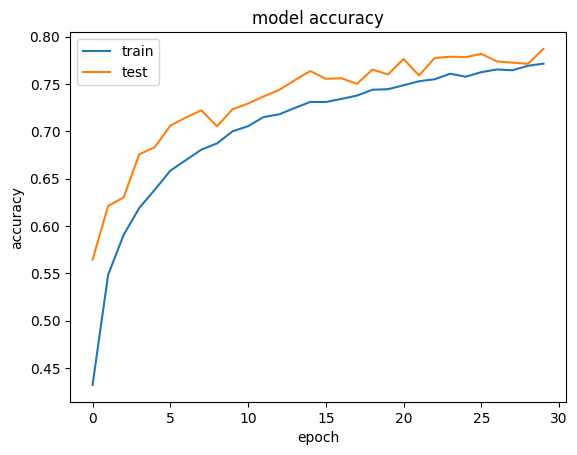

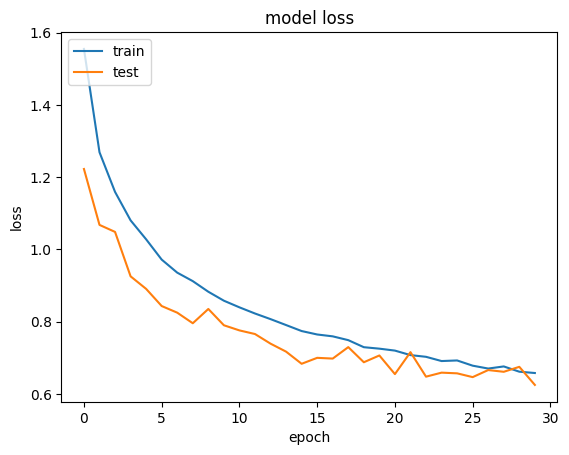

In [9]:
history=model.fit(datagen.flow(ax, ay, batch_size=batch_size),
steps_per_epoch=ax.shape[0]//batch_size,
epochs=epochs, verbose=2, validation_data=(qx, qy))
impHistoria(history)

In [10]:
score = model.evaluate(qx, qy, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('cnn1.h5')

313/313 - 2s - loss: 0.6247 - accuracy: 0.7871 - 2s/epoch - 5ms/step
Test loss: 0.6246561408042908
Test accuracy: 0.7871000170707703
